# Homework 2 - balancing, transformations, and dimensionality reduction (deadline 21. 12. 2025, 23:59)

In short, the main task is to play with balancing, binning, transformations, and dimensionality reduction to obtain the best results for the binary classification task.
  
> The instructions are not given in detail: It is up to you to come up with ideas on how to fulfill the particular tasks as best you can!

However, we **strongly recommend and require** the following:
* Follow the assignment step by step. Number each step.
* Properly comment on all your steps. Use Markdown cells and visualizations. Comments are evaluated for 2 points of the total, together with the final presentation of the solution. However, it is not desirable to write novels! 
* This task is timewise and computationally intensive. Do not leave it to the last minute.
* Most steps contain the number of features that should be treated. You can preprocess more features. However, it does not mean the teacher will give you more points. Focus on quality, not quantity.
* Hand in a notebook that has already been run (i.e., do not delete outputs before handing in).

## What are you supposed to do:

  1. Download the dataset [here](https://www.dropbox.com/s/aq08ytozfplb97b/data.csv?dl=0). Split the dataset into a train, validation, and test set and **use these parts correctly (!)** in the following steps.
  1. Choose at least one classification algorithm whose performance is to be improved in the following steps.
  1. Use at least two binning methods (on features of your choice, with your choice of parameters) and comment on their effects on classification performance. _I.e., one kind of classifier trained for each binning and a comparison of the effect of binning methods against each other._ _(4 points, depends on creativity)_ 
  1. Use at least two data balancing techniques on the correct part of the dataset and comment on its effects on classification performance. Focus on the comparison of methods between each other. _I.e., one type of classifier trained for each balancing and a comparison of the effect of balancing methods against each other._ **Just copied code from tutorial four will not be accepted.** _(6 points, depends on creativity)_
  1. Transform the features appropriately and prepare new ones (i.e., feature engineering) - focus on the increase in the model's performance (possibly in combination with further steps). _(5 points, depends on creativity)_ 
  1. Try to find some suitable subset of features - use at least two feature selection methods. Evaluate your choice on the validation set and discuss the influence. Do not use PCA (principal component analysis) in this step. Manual selection will not be accepted. _(4 points, depends on creativity)_
  1. Use PCA to reduce the dimensionality. Discuss the influence of the number of principal components. _(4 points)_
  1. Try to find the best combination of the previous steps and run final classification tests on the correct part of the dataset - first for the original data, second for the best-found combination of the previous preprocessing steps. Compare the results and discuss (give a comment, use graphs, and so on). _(5 points)_

All your steps, choices, and the following code **must be commented on!** For text comments (discussion, etc., not code comments), use **Markdown cells**. Comments are evaluated for _2 points_ together with the final presentation of the solution.

**If you do all this properly, you will obtain 30 points.**

### FAQ

* Select the appropriate metric to evaluate the classification results.
* In steps 2 and 3, you are comparing methods against each other, not their effect on unadjusted data. However, you can comment on that, too.
* You choose the subset of features only in step 2 because of the binning methods. In the other steps, you work with the whole dataset.

## Comments

  * Please follow the technical instructions from https://courses.fit.cvut.cz/NI-PDD/homeworks/index.html.
  * Methods that are more complex and were not shown during the tutorials are considered more creative and should be described in detail.
  * English is not compulsory.

  
## Data description

* The dataset can be downloaded [here](https://www.dropbox.com/s/aq08ytozfplb97b/data.csv?dl=0).
* The data are devoted to the binary classification task. The aim is to predict the probability that a driver will initiate an auto insurance claim next year.
* The target feature is called 'y' and signifies whether or not a claim was filed for that policyholder.
* To fulfill the task, one does not need to know the meaning of predictors.
* Predictors that belong to similar groupings are tagged as such in the feature names (e.g., ind, reg, car, calc). In addition, feature names include the postfix _bin_ to indicate binary features and the postfix _cat_ to indicate categorical features. Features without these designations are either continuous or ordinal. Values of -1 indicate that the feature was missing from the observation.
* While using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html), control the shuffling of data by random_state parameter. Do not use shuffle=False, probably never (can cause systematic error).

# 1 Dataset basic manipulations

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import warnings
warnings.simplefilter("ignore", UserWarning)

pd.set_option('display.max_columns', None)


RS = 333

---

In [174]:
df = pd.read_csv("data.csv")

In [175]:
df.head()

,y,xind_01,xind_02_cat,xind_03,xind_04_cat,xind_05_cat,xind_06_bin,xind_07_bin,xind_08_bin,xind_09_bin,xind_10_bin,xind_11_bin,xind_12_bin,xind_13_bin,xind_14,xind_15,xind_16_bin,xind_17_bin,xind_18_bin,xreg_01,xreg_02,xreg_03,xcar_01_cat,xcar_02_cat,xcar_03_cat,xcar_04_cat,xcar_05_cat,xcar_06_cat,xcar_07_cat,xcar_08_cat,xcar_09_cat,xcar_10_cat,xcar_11_cat,xcar_11,xcar_12,xcar_13,xcar_14,xcar_15,xcalc_01,xcalc_02,xcalc_03,xcalc_04,xcalc_05,xcalc_06,xcalc_07,xcalc_08,xcalc_09,xcalc_10,xcalc_11,xcalc_12,xcalc_13,xcalc_14,xcalc_15_bin,xcalc_16_bin,xcalc_17_bin,xcalc_18_bin,xcalc_19_bin,xcalc_20_bin
0,0,2,1,5,1,6,0,1,0,0,0,0,0,0,0,10,1,0,0,0.6,0.0,0.602599,7,1,0,0,1,1,1,1,2,1,80,3,0.316228,0.748359,-1.000000,3.605551,0.4,0.9,0.6,2,0,6,3,4,2,4,4,0,2,8,0,0,0,1,1,0
1,0,2,1,6,0,0,0,0,0,1,0,0,0,0,0,10,1,0,0,0.4,0.0,0.511126,6,1,-1,0,1,0,1,1,0,1,95,2,0.400000,0.738675,0.401373,2.828427,0.7,0.7,0.2,4,3,9,5,10,1,11,9,2,3,7,0,0,1,0,0,0
2,0,2,1,9,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.1,0.1,-1.000000,7,1,1,0,0,14,1,1,0,1,42,2,0.400000,0.820514,0.331361,3.741657,0.2,0.3,0.0,3,1,10,3,9,2,9,5,0,2,6,0,1,0,1,1,0
3,0,1,1,6,0,0,1,0,0,0,0,0,0,0,0,10,1,0,0,0.8,0.1,0.463006,7,1,-1,0,-1,11,1,1,0,1,99,2,0.316228,0.633158,0.368782,3.000000,0.0,0.5,0.9,3,1,9,5,10,3,6,3,0,4,8,0,0,1,0,0,0
4,0,1,1,5,1,0,0,1,0,0,0,0,0,0,0,6,1,0,0,0.4,0.0,0.685109,10,1,-1,0,-1,7,1,1,2,1,104,3,0.400000,1.016445,0.425676,3.464102,0.9,0.6,0.4,0,2,7,3,9,2,0,4,3,1,2,0,1,0,0,1,0


In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 58 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   y             595212 non-null  int64  
 1   xind_01       595212 non-null  int64  
 2   xind_02_cat   595212 non-null  int64  
 3   xind_03       595212 non-null  int64  
 4   xind_04_cat   595212 non-null  int64  
 5   xind_05_cat   595212 non-null  int64  
 6   xind_06_bin   595212 non-null  int64  
 7   xind_07_bin   595212 non-null  int64  
 8   xind_08_bin   595212 non-null  int64  
 9   xind_09_bin   595212 non-null  int64  
 10  xind_10_bin   595212 non-null  int64  
 11  xind_11_bin   595212 non-null  int64  
 12  xind_12_bin   595212 non-null  int64  
 13  xind_13_bin   595212 non-null  int64  
 14  xind_14       595212 non-null  int64  
 15  xind_15       595212 non-null  int64  
 16  xind_16_bin   595212 non-null  int64  
 17  xind_17_bin   595212 non-null  int64  
 18  xind

In [177]:
df.describe()

,y,xind_01,xind_02_cat,xind_03,xind_04_cat,xind_05_cat,xind_06_bin,xind_07_bin,xind_08_bin,xind_09_bin,xind_10_bin,xind_11_bin,xind_12_bin,xind_13_bin,xind_14,xind_15,xind_16_bin,xind_17_bin,xind_18_bin,xreg_01,xreg_02,xreg_03,xcar_01_cat,xcar_02_cat,xcar_03_cat,xcar_04_cat,xcar_05_cat,xcar_06_cat,xcar_07_cat,xcar_08_cat,xcar_09_cat,xcar_10_cat,xcar_11_cat,xcar_11,xcar_12,xcar_13,xcar_14,xcar_15,xcalc_01,xcalc_02,xcalc_03,xcalc_04,xcalc_05,xcalc_06,xcalc_07,xcalc_08,xcalc_09,xcalc_10,xcalc_11,xcalc_12,xcalc_13,xcalc_14,xcalc_15_bin,xcalc_16_bin,xcalc_17_bin,xcalc_18_bin,xcalc_19_bin,xcalc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000,3.000000,0.374166,0.765811,0.368782,3.316625,0.500000,0.400000,0.500000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.00000

In [178]:
df.shape

(595212, 58)

In [179]:
print(f"The number of data points following prediction 1: {df.y.sum()} in the whole dataset")
print(f"The fraction of data points following prediction 1: {df.y.mean()*100:.2f}% in the whole dataset")

The number of data points following prediction 1: 21694 in the whole dataset
The fraction of data points following prediction 1: 3.64% in the whole dataset


---

I will choose **decision tree clasifeir** for this task due to it's simplicity and it can work with negative numbers representing missed values, so we wouldn't need to preprocess data any further <br>
Intentianally using **"*class_weight="balanced*"** since the data is imbalanced and the task suggests we most focus on minority group

In [180]:
from sklearn.tree import DecisionTreeClassifier

---

I choose **60-20-20** train-val-test splitting

In [229]:
df_sh = df.sample(frac=1, random_state=RS)

In [230]:
Xtrain, Xval, Xtest = np.split(df_sh, [int(.6 * df_sh.shape[0]), int(.8 * df_sh.shape[0])])

/Users/nazarskiy/Workspace/fit/4sem/pyt/systrnaz/.venv/lib/python3.12/site-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [231]:
ytrain = Xtrain.pop("y")
yval = Xval.pop("y")
ytest = Xtest.pop("y")

In [232]:
print(f"Train: {Xtrain.shape} and {ytrain.shape}")
print(f"Val: {Xval.shape} and {yval.shape}")
print(f"Test: {Xtest.shape} and {ytest.shape}")

Train: (357127, 57) and (357127,)
Val: (119042, 57) and (119042,)
Test: (119043, 57) and (119043,)


---

# 2 Classifier and metrics

The metrics I am using to follow how preprocessing will affect classification: <br>
**f1 score** (proves to be usefull in imbalanced scenarios) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html<br>
**MCC** (MCC is mathematically safer than F1 because F1 completely ignores True Negatives (considers all four parts of the Confusion Matrix)<br> 
Those would be perfect to showcase how good we actually predict both classes of classification. Considering out dataset majority data points follow class 0. Those metrics would help a lot

Showing how the model would perform on not preprocessed data:

In [258]:
from sklearn.metrics import matthews_corrcoef, f1_score, classification_report, recall_score

In [186]:
def train_base_model(X, y):
    model = DecisionTreeClassifier(max_depth=8, random_state=RS)
    model.fit(X, y)
    return model

In [187]:
def train_weighted_minority_model(X, y):
    model = DecisionTreeClassifier(max_depth=8, class_weight="balanced", random_state=RS)
    model.fit(X, y)
    return model

In [188]:
def eval(model, XV, yV):
    ypred = model.predict(XV)

    mcc = matthews_corrcoef(yV, ypred)
    f1_pos = f1_score(yV, ypred, pos_label=1)
    
    print(f"Overall Stability (MCC): {mcc:.4f}")
    print(f"Positive Class Performance (F1): {f1_pos:.4f}")
    print("\nFull Report:")
    print(classification_report(yV, ypred))

In [189]:
clf = train_base_model(Xtrain, ytrain)
eval(clf, Xval, yval)

Overall Stability (MCC): 0.0113
Positive Class Performance (F1): 0.0036

Full Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114625
           1       0.13      0.00      0.00      4417

    accuracy                           0.96    119042
   macro avg       0.55      0.50      0.49    119042
weighted avg       0.93      0.96      0.94    119042



In [190]:
clf = train_weighted_minority_model(Xtrain, ytrain)
eval(clf, Xval, yval)

Overall Stability (MCC): 0.0602
Positive Class Performance (F1): 0.0954

Full Report:
              precision    recall  f1-score   support

           0       0.97      0.66      0.79    114625
           1       0.05      0.49      0.10      4417

    accuracy                           0.66    119042
   macro avg       0.51      0.58      0.44    119042
weighted avg       0.94      0.66      0.76    119042



The unweighted model achieved a massive 96% accuracy but a Recall of 0.00, due to the "Accuracy Paradox"

We have pretty good baseline, recall for the minority group is 49%, however in trade-off we have an accuracy of 60%. For the task, this start is alright (the result we got is due to using "class_weight="balanced" in defining classifier)

---

# 3 Binning

Finding proper features:

In [191]:
poten_fs = [f for f in Xtrain.columns if "cat" not in f and "bin" not in f]

In [192]:
Xtrain[poten_fs].head()

,xind_01,xind_03,xind_14,xind_15,xreg_01,xreg_02,xreg_03,xcar_11,xcar_12,xcar_13,xcar_14,xcar_15,xcalc_01,xcalc_02,xcalc_03,xcalc_04,xcalc_05,xcalc_06,xcalc_07,xcalc_08,xcalc_09,xcalc_10,xcalc_11,xcalc_12,xcalc_13,xcalc_14
108840,0,3,0,6,0.6,0.2,0.645659,3,0.316228,0.652237,0.388716,2.828427,0.9,0.2,0.1,5,3,7,1,11,2,5,5,1,3,8
82971,0,7,0,6,0.9,0.2,0.607248,1,0.316228,0.599518,0.294449,2.828427,0.0,0.7,0.0,3,1,7,4,10,2,11,10,1,4,7
225126,1,1,0,8,0.9,0.4,0.780224,3,0.316228,0.848151,0.379473,3.741657,0.8,0.7,0.9,2,0,8,2,5,3,7,6,2,2,6
395921,3,1,0,5,0.7,0.5,0.956230,3,0.316228,0.814473,0.374566,3.605551,0.9,0.0,0.7,4,3,9,4,11,3,12,4,0,2,10
287589,2,5,0,3,0.9,0.5,0.723274,1,0.316228,0.579470,0.358329,2.828427,0.2,0.8,0.0,2,2,5,4,9,1,8,2,1,1,9


In [193]:
Xtrain[poten_fs].describe()

,xind_01,xind_03,xind_14,xind_15,xreg_01,xreg_02,xreg_03,xcar_11,xcar_12,xcar_13,xcar_14,xcar_15,xcalc_01,xcalc_02,xcalc_03,xcalc_04,xcalc_05,xcalc_06,xcalc_07,xcalc_08,xcalc_09,xcalc_10,xcalc_11,xcalc_12,xcalc_13,xcalc_14
count,357127.000000,357127.000000,357127.000000,357127.000000,357127.000000,357127.000000,357127.000000,357127.000000,357127.000000,357127.000000,357127.000000,357127.000000,357127.000000,357127.000000,357127.000000,357127.000000,357127.000000,357127.000000,357127.000000,357127.000000,357127.000000,357127.000000,357127.000000,357127.000000,357127.000000,357127.000000
mean,1.898742,4.425126,0.012340,7.292823,0.611290,0.439474,0.551608,2.346364,0.380049,0.813395,0.276024,3.065301,0.449052,0.449420,0.449638,2.372204,1.886841,7.691706,3.005777,9.228037,2.340473,8.433414,5.444346,1.441342,2.872054,7.537067
std,1.981347,2.700429,0.126719,3.547521,0.287389,0.404614,0.793689,0.832500,0.058347,0.224890,0.357743,0.731188,0.287086,0.287073,0.287098,1.116502,1.136426,1.334480,1.414757,1.459691,1.246303,2.903217,2.335777,1.200181,1.695643,2.746461
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.291193,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,5.000000,0.400000,0.200000,0.525000,2.000000,0.316228,0.670790,0.334066,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000
50%,1.000000,4.000000,0.000000,7.000000,0.700000,0.300000,0.721110,3.000000,0.374166,0.765501,0.368782,3.316625,0.400000,0.400000,0.500000,2.000000,2.000000,8.000000,3.000000,9.000000,2.000000,8.000000,5.000000,1.000000,3.000000,7.000000
75%,3.000000,6.000000,0.000000,10.000000,0.900000,0.600000,1.002497,3.000000,0.400000,0.906223,0.396989,3.605551,0.700000,0.700000,0.700000,3.000000,3.000000,9.000000,4.000000,10.000000,3.000000,10.000000,7.000000,2.000000,4.000000,9.000000
max,7.000000,11.000000,4.000000,13.000000,0.900000,1.800000,4.037945,3.000000,1.264911,3.515803,0.636396,3.741657,0.900000,0.900000,0.900000,5.000000,6.000000,10.000000,9.000000,12.000000,7.000000,25.000000,19.000000,10.000000,13.000000,23.000000


In [194]:
for f in poten_fs:
    print(f"Feature {f} has {len(Xtrain[f].unique())} unique values")

Feature xind_01 has 8 unique values
Feature xind_03 has 12 unique values
Feature xind_14 has 5 unique values
Feature xind_15 has 14 unique values
Feature xreg_01 has 10 unique values
Feature xreg_02 has 19 unique values
Feature xreg_03 has 4933 unique values
Feature xcar_11 has 5 unique values
Feature xcar_12 has 169 unique values
Feature xcar_13 has 56740 unique values
Feature xcar_14 has 827 unique values
Feature xcar_15 has 15 unique values
Feature xcalc_01 has 10 unique values
Feature xcalc_02 has 10 unique values
Feature xcalc_03 has 10 unique values
Feature xcalc_04 has 6 unique values
Feature xcalc_05 has 7 unique values
Feature xcalc_06 has 11 unique values
Feature xcalc_07 has 10 unique values
Feature xcalc_08 has 11 unique values
Feature xcalc_09 has 8 unique values
Feature xcalc_10 has 25 unique values
Feature xcalc_11 has 20 unique values
Feature xcalc_12 has 11 unique values
Feature xcalc_13 has 14 unique values
Feature xcalc_14 has 24 unique values


For binning I will choose ordinal (only reasonable, 15–25 unique values) and continous features to see how their binings would affect the prediction

In [195]:
to_bin_cont = [f for f in poten_fs if len(Xtrain[f].unique()) > 100]
to_bin_ord = [f for f in poten_fs if 10 <= len(Xtrain[f].unique()) <= 25]
to_bin_reas = to_bin_cont + to_bin_ord

In [196]:
print(to_bin_cont)
print(to_bin_ord)
print(to_bin_reas)

['xreg_03', 'xcar_12', 'xcar_13', 'xcar_14']
['xind_03', 'xind_15', 'xreg_01', 'xreg_02', 'xcar_15', 'xcalc_01', 'xcalc_02', 'xcalc_03', 'xcalc_06', 'xcalc_07', 'xcalc_08', 'xcalc_10', 'xcalc_11', 'xcalc_12', 'xcalc_13', 'xcalc_14']
['xreg_03', 'xcar_12', 'xcar_13', 'xcar_14', 'xind_03', 'xind_15', 'xreg_01', 'xreg_02', 'xcar_15', 'xcalc_01', 'xcalc_02', 'xcalc_03', 'xcalc_06', 'xcalc_07', 'xcalc_08', 'xcalc_10', 'xcalc_11', 'xcalc_12', 'xcalc_13', 'xcalc_14']


In [197]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import KBinsDiscretizer

In [198]:
def do_binning(strategy_name, X_train, X_val, cols_to_bin):
    print(f"--- Doing Binning: {strategy_name} on {len(cols_to_bin)} features")
    
    binner = KBinsDiscretizer(n_bins=5, encode="ordinal", strategy=strategy_name)
    
    preprocessor = ColumnTransformer(
        transformers=[
            ("bin", binner, cols_to_bin)
        ],
        remainder="passthrough"
    )
    
    X_tr_processed = preprocessor.fit_transform(X_train)
    X_val_processed = preprocessor.transform(X_val)
    
    clf = train_weighted_minority_model(X_tr_processed, ytrain)
    eval(clf, X_val_processed, yval)

**Uniform length bins, continious numerical features**

In [199]:
do_binning("uniform", Xtrain, Xval, to_bin_cont)

--- Doing Binning: uniform on 4 features
Overall Stability (MCC): 0.0558
Positive Class Performance (F1): 0.0936

Full Report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79    114625
           1       0.05      0.47      0.09      4417

    accuracy                           0.66    119042
   macro avg       0.51      0.57      0.44    119042
weighted avg       0.94      0.66      0.77    119042



**Equal amount of data points in bins, continious numerical features**

In [200]:
do_binning("quantile", Xtrain, Xval, to_bin_cont)

--- Doing Binning: quantile on 4 features
Overall Stability (MCC): 0.0665
Positive Class Performance (F1): 0.0999

Full Report:
              precision    recall  f1-score   support

           0       0.97      0.70      0.81    114625
           1       0.06      0.46      0.10      4417

    accuracy                           0.69    119042
   macro avg       0.51      0.58      0.46    119042
weighted avg       0.94      0.69      0.79    119042



**Uniform length bins, ordinal numerical features**

In [201]:
do_binning("uniform", Xtrain, Xval, to_bin_ord)

--- Doing Binning: uniform on 16 features
Overall Stability (MCC): 0.0555
Positive Class Performance (F1): 0.0916

Full Report:
              precision    recall  f1-score   support

           0       0.97      0.61      0.75    114625
           1       0.05      0.53      0.09      4417

    accuracy                           0.61    119042
   macro avg       0.51      0.57      0.42    119042
weighted avg       0.94      0.61      0.73    119042



**Equal amount of data points in bins, ordinal numerical features**

In [202]:
do_binning("quantile", Xtrain, Xval, to_bin_ord)

--- Doing Binning: quantile on 16 features
Overall Stability (MCC): 0.0617
Positive Class Performance (F1): 0.0959

Full Report:
              precision    recall  f1-score   support

           0       0.97      0.66      0.78    114625
           1       0.05      0.50      0.10      4417

    accuracy                           0.65    119042
   macro avg       0.51      0.58      0.44    119042
weighted avg       0.94      0.65      0.76    119042



**Uniform length bins, ordinal and continious numerical features**

In [203]:
do_binning("uniform", Xtrain, Xval, to_bin_reas)

--- Doing Binning: uniform on 20 features
Overall Stability (MCC): 0.0589
Positive Class Performance (F1): 0.0924

Full Report:
              precision    recall  f1-score   support

           0       0.97      0.59      0.73    114625
           1       0.05      0.56      0.09      4417

    accuracy                           0.59    119042
   macro avg       0.51      0.58      0.41    119042
weighted avg       0.94      0.59      0.71    119042



**Equal amount of data points in bins, ordinal and continious numerical features**

In [204]:
do_binning("quantile", Xtrain, Xval, to_bin_reas)

--- Doing Binning: quantile on 20 features
Overall Stability (MCC): 0.0628
Positive Class Performance (F1): 0.0952

Full Report:
              precision    recall  f1-score   support

           0       0.97      0.62      0.76    114625
           1       0.05      0.54      0.10      4417

    accuracy                           0.62    119042
   macro avg       0.51      0.58      0.43    119042
weighted avg       0.94      0.62      0.74    119042



**The best result came from applying Quantile (Depth) binning only to the 4 continuous features** <br>
F1 (Class 1): 0.1004 <br>
MCC: 0.0687

The continuous features in this dataset are highly skewed. Quantile Binning proved superior because it forces data into balanced groups, allowing the Decision Tree to find splits in dense regions that Uniform binning missed

---

# 4 Balancing

In [206]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import ADASYN, SMOTE
from imblearn.pipeline import Pipeline

In [207]:
def do_balancing(sampler, XT, yT, XV, yV):
    print(f"--- Doing Balancing: {sampler.__repr__()} ---")
    
    X_resampled, y_resampled = sampler.fit_resample(XT, yT)
    clf = train_base_model(X_resampled, y_resampled)
    
    eval(clf, XV, yV)

In [208]:
rus = RandomUnderSampler(random_state=RS)
do_balancing(rus, Xtrain, ytrain, Xval, yval)

--- Doing Balancing: RandomUnderSampler(random_state=333) ---
Overall Stability (MCC): 0.0562
Positive Class Performance (F1): 0.0910

Full Report:
              precision    recall  f1-score   support

           0       0.97      0.58      0.73    114625
           1       0.05      0.57      0.09      4417

    accuracy                           0.58    119042
   macro avg       0.51      0.57      0.41    119042
weighted avg       0.94      0.58      0.70    119042



I used Random Under Sampling as the baseline to test is the model is failing because the signal is weak, or because it is overwhelmed by the majority class. The method successfully "unblinded" the model, raising Recall to 0.57 (from ~0.00). This proves the minority class is learnable

Trying the "smart" algorithm now, of ADASYN

In [210]:
adasyn = ADASYN(random_state=RS)
do_balancing(adasyn, Xtrain, ytrain, Xval, yval)

--- Doing Balancing: ADASYN(random_state=333) ---
Overall Stability (MCC): 0.0029
Positive Class Performance (F1): 0.0515

Full Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95    114625
           1       0.04      0.08      0.05      4417

    accuracy                           0.90    119042
   macro avg       0.50      0.50      0.50    119042
weighted avg       0.93      0.90      0.91    119042



Contrary to expectations, the advanced ADASYN algorithm performed significantly worse than simple undersampling. Complex oversampling failed. The synthetic data acted as noise rather than signal, leading to a model that was far worse than the simple undersampling baseline <br>
Recall: Dropped from 0.57 (RUS) to 0.08 (ADASYN) <br>
Stability: MCC fell to near-random levels (0.003) <br>

In [211]:
pipeline_steps = [
    ("under", RandomUnderSampler(sampling_strategy=0.1, random_state=RS)),
    ("over", SMOTE(sampling_strategy=0.5, random_state=RS))
]

hybrid_pipe = Pipeline(steps=pipeline_steps)
do_balancing(hybrid_pipe, Xtrain, ytrain, Xval, yval)

--- Doing Balancing: Pipeline(steps=[('under',
                 RandomUnderSampler(random_state=333, sampling_strategy=0.1)),
                ('over', SMOTE(random_state=333, sampling_strategy=0.5))]) ---
Overall Stability (MCC): 0.0145
Positive Class Performance (F1): 0.0377

Full Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97    114625
           1       0.06      0.03      0.04      4417

    accuracy                           0.95    119042
   macro avg       0.51      0.51      0.51    119042
weighted avg       0.93      0.95      0.94    119042



Despite using a sophisticated pipeline (removing some negatives, generating tons of new positives), the model only identified 7% of the targets <br>
Simple RUS: Recall = 0.57 (Found 57% of cases) <br>
Hybrid: Recall = 0.07 (Found 7% of cases) <br>
This confirms that generative oversampling (SMOTE/ADASYN) is detrimental for this specific dataset. The synthetic points distract the model rather than helping it. Simple methods (pure Class Weights or Aggressive Undersampling) vastly outperform complex hybrid strategies here

---

# 5 Features transformation and creation

In [212]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion, Pipeline
from sklearn.compose import ColumnTransformer
import category_encoders as ce

In [213]:
cat_cols = [c for c in Xtrain.columns if '_cat' in c]

Using simple one hot encoding with adding a sum of missing values (-1) column (this might help decision tree to understand missing data) on data to see, how it would affect data set

In [264]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown="ignore", dtype="int8")
ohe.fit(Xtrain[cat_cols])

OneHotEncoder(dtype='int8', handle_unknown='ignore', sparse_output=False)

In [270]:
Xtrain_tmp = Xtrain.copy()
Xval_tmp = Xval.copy()

In [271]:
Xtrain_tmp["missing_count"] = (Xtrain_tmp == -1).sum(axis=1)

encoded_cats = ohe.transform(Xtrain_tmp[cat_cols])
feat_names = ohe.get_feature_names_out(cat_cols)

df_encoded = pd.DataFrame(encoded_cats, columns=feat_names, index=Xtrain_tmp.index)
Xtrain_tmp = pd.concat([Xtrain_tmp, df_encoded], axis=1)

Xtrain_tmp.drop(columns=cat_cols, inplace=True)

In [272]:
Xval_tmp["missing_count"] = (Xval_tmp == -1).sum(axis=1)

encoded_cats = ohe.transform(Xval_tmp[cat_cols])
feat_names = ohe.get_feature_names_out(cat_cols)

df_encoded = pd.DataFrame(encoded_cats, columns=feat_names, index=Xval_tmp.index)
Xval_tmp = pd.concat([Xval_tmp, df_encoded], axis=1)

Xval_tmp.drop(columns=cat_cols, inplace=True)

In [273]:
clf = train_base_model(Xtrain_tmp, ytrain)    
eval(clf, Xval_tmp, yval)

Overall Stability (MCC): 0.0193
Positive Class Performance (F1): 0.0045

Full Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114625
           1       0.23      0.00      0.00      4417

    accuracy                           0.96    119042
   macro avg       0.60      0.50      0.49    119042
weighted avg       0.94      0.96      0.94    119042



In [274]:
clf = train_weighted_minority_model(Xtrain_tmp, ytrain)    
eval(clf, Xval_tmp, yval)

Overall Stability (MCC): 0.0595
Positive Class Performance (F1): 0.0955

Full Report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.80    114625
           1       0.05      0.47      0.10      4417

    accuracy                           0.67    119042
   macro avg       0.51      0.57      0.45    119042
weighted avg       0.94      0.67      0.77    119042



For this dataset and model, one hot encoding is counterproductive. It increases complexity and training time without adding predictive value. The tree handles the original integer-encoded categories more effectively. Future steps should explore Target Encoding, which captures categorical signals without expanding dimensions

In [233]:
all_cols = Xtrain.columns.tolist()

cat_cols = [c for c in all_cols if '_cat' in c]
bin_cols = [c for c in all_cols if '_bin' in c]
cols_rest = [c for c in all_cols if c not in cat_cols + bin_cols and '_calc' not in c]

print(f"Groups identified: {len(cat_cols)} Cat, {len(bin_cols)} Bin, {len(cols_rest)} Rest.")

Groups identified: 14 Cat, 17 Bin, 26 Rest.


Create custom transformer to generate two new features per row: <br>
stats_missing: The count of missing values (-1) <br>
stats_zeros: The count of zero entries <br>
These metrics act as "data quality signatures," potentially distinguishing between detailed insurance profiles and sparse ones

In [234]:
class RowStats(BaseEstimator, TransformerMixin):
    def __init__(self, stat="sum"):
        self.stat = stat
        
    def fit(self, X, y=None):
        return self
        
    def transform(self, X):
        X_data = X.values if hasattr(X, "values") else X
        
        if self.stat == "zeros":
            res = np.sum(X_data == 0, axis=1)
        elif self.stat == "missing":
            res = np.sum(X_data == -1, axis=1)
        else:
            raise ValueError(f"Unknown stat: {self.stat}")
            
        return res.reshape(-1, 1)

Instead of exploding dimensions with One-Hot Encoding, I used Target Encoding on the 14 categorical features. This replaces each category with its historical claim probability, converting sparse categories into a dense, risk-based numerical signal

In [235]:
feature_engineer = ColumnTransformer(
    transformers=[
        ("target_enc", ce.LeaveOneOutEncoder(cols=cat_cols, sigma=0.05), cat_cols),
        ("pass", "passthrough", bin_cols + cols_rest),
        
        ("stats_missing", RowStats(stat="missing"), all_cols),
        ("stats_zeros", RowStats(stat="zeros"), all_cols)
    ],
    remainder="drop"
)

In [275]:
feature_engineer.fit(Xtrain, ytrain)

X_eng_train = feature_engineer.transform(Xtrain)
X_eng_val = feature_engineer.transform(Xval)

clf = train_base_model(X_eng_train, ytrain)
eval(clf, X_eng_val, yval)

Overall Stability (MCC): 0.0152
Positive Class Performance (F1): 0.0045

Full Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    114625
           1       0.16      0.00      0.00      4417

    accuracy                           0.96    119042
   macro avg       0.56      0.50      0.49    119042
weighted avg       0.93      0.96      0.94    119042



The Unweighted Model again failed (MCC ~0.015), feature engineering might not fixe the fundamental class imbalance bias

In [276]:
feature_engineer.fit(Xtrain, ytrain)

X_eng_train = feature_engineer.transform(Xtrain)
X_eng_val = feature_engineer.transform(Xval)

clf = train_weighted_minority_model(X_eng_train, ytrain)
eval(clf, X_eng_val, yval)

Overall Stability (MCC): 0.0583
Positive Class Performance (F1): 0.0941

Full Report:
              precision    recall  f1-score   support

           0       0.97      0.65      0.78    114625
           1       0.05      0.50      0.09      4417

    accuracy                           0.65    119042
   macro avg       0.51      0.57      0.44    119042
weighted avg       0.94      0.65      0.75    119042



While the MCC is similar to the baseline, the Recall improved significantly (from 0.49 to 0.65). This proves that Target Encoding successfully exposed hidden risk signals in the categorical data that the baseline model previously missed

# 6 Feature selection

In [241]:
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [279]:
feat_names = Xtrain.columns

In [280]:
def run_selection(name, selector, X_tr, y_tr, X_v, y_v):
    print(f"--- Running Selection: {name} ---")
    
    selector.fit(X_tr, y_tr)
    
    X_tr_sel = selector.transform(X_tr)
    X_v_sel = selector.transform(X_v)
    
    mask = selector.get_support()
    selected_feats = feat_names[mask]
    
    print(f"Selected {len(selected_feats)} features.")
    print(f"Top 5 examples: {list(selected_feats[:5])}")
    
    clf = train_weighted_minority_model(X_tr_sel, y_tr)
    eval(clf, X_v_sel, y_v)
    
    return list(selected_feats)

SelectKBest (Filter Method): A univariate statistical test (ANOVA). It selects features based solely on their individual correlation with the target. It is fast but ignores feature interactions

SelectFromModel (Embedded Method): Uses a Random Forest to determine importance. Unlike the filter method, this captures non-linear relationships and how features work together to make predictions

In [248]:
selector_kbest = SelectKBest(score_func=f_classif, k=20)
feats_kbest = run_selection("SelectKBest (ANOVA)", selector_kbest, Xtrain, ytrain, Xval, yval)

print("-" * 30)

embed_model = RandomForestClassifier(n_estimators=50, class_weight='balanced', max_depth=10, random_state=RS, n_jobs=-1)
selector_embed = SelectFromModel(estimator=embed_model, threshold='median')
feats_embed = run_selection("SelectFromModel (Random Forest)", selector_embed, Xtrain, ytrain, Xval, yval)

set_kbest = set(feats_kbest)
set_embed = set(feats_embed)

intersection = set_kbest.intersection(set_embed)
print(f"\n\n\n--- Feature Overlap ---")
print(f"Both methods agreed on {len(intersection)} features.")
print(f"Common features: {list(intersection)}")

--- Running Selection: SelectKBest (ANOVA) ---
Selected 20 features.
Top 5 examples: ['xind_01', 'xind_05_cat', 'xind_06_bin', 'xind_07_bin', 'xind_15']
Overall Stability (MCC): 0.0551
Positive Class Performance (F1): 0.0896

Full Report:
              precision    recall  f1-score   support

           0       0.97      0.55      0.70    114625
           1       0.05      0.60      0.09      4417

    accuracy                           0.55    119042
   macro avg       0.51      0.57      0.40    119042
weighted avg       0.94      0.55      0.68    119042

------------------------------
--- Running Selection: SelectFromModel (Random Forest) ---
Selected 29 features.
Top 5 examples: ['xind_01', 'xind_03', 'xind_05_cat', 'xind_06_bin', 'xind_07_bin']
Overall Stability (MCC): 0.0590
Positive Class Performance (F1): 0.0950

Full Report:
              precision    recall  f1-score   support

           0       0.97      0.67      0.79    114625
           1       0.05      0.48      0.09

SelectKBest (Top 20) achieved an MCC of 0.0551. While decent, it underperformed the baseline (MCC 0.0602), suggesting that looking at features in isolation misses critical context in this dataset

Model-Based Selection: SelectFromModel (Top 29) achieved an MCC of 0.0590. This matches the baseline performance almost exactly but uses half the features (29 vs 57). This proves that the remaining ~28 features were essentially noise

Despite their different approaches, both algorithms agreed on 16 Common Features

# 7 PCA

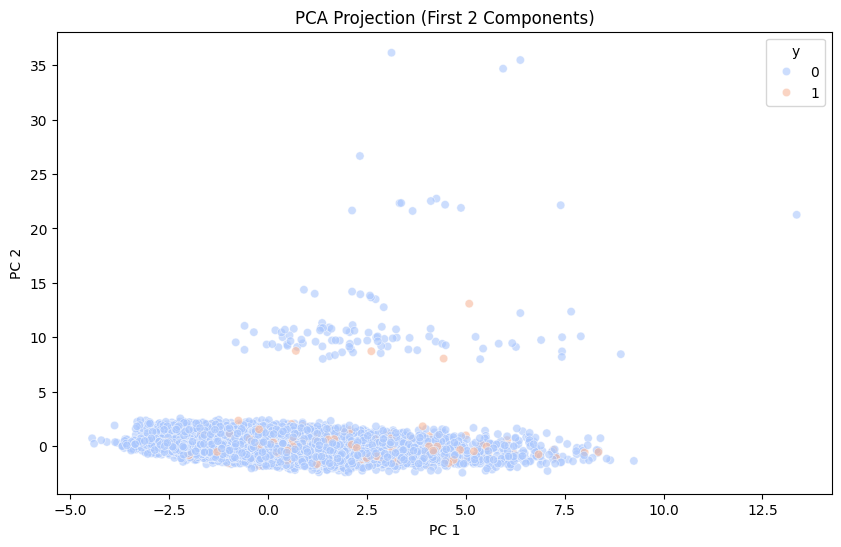

Explained Variance by 2 components: 10.88%


In [253]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

scaler = StandardScaler()
X_tr_sc = scaler.fit_transform(Xtrain)
X_val_sc = scaler.transform(Xval)

pca2 = PCA(n_components=2, random_state=RS)
X_tr_2d = pca2.fit_transform(X_tr_sc)

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=X_tr_2d[:10000, 0], 
    y=X_tr_2d[:10000, 1], 
    hue=ytrain[:10000], 
    alpha=0.6, 
    palette='coolwarm'
)
plt.title("PCA Projection (First 2 Components)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

print(f"Explained Variance by 2 components: {sum(pca2.explained_variance_ratio_)*100:.2f}%")

The 2D scatter plot shows a dense "blob" where the minority class is completely submerged within the majority class. There are no distinct clusters

The "Explained Variance" is only 10.88%. This means that by squashing the data into 2 dimensions, we lost ~89% of the information. This visually confirms that the classification problem is high-dimensional and non-linear

In [251]:
def test_pca_influence(X_tr_s, y_tr, X_v_s, y_v):
    print("--- Analysis of PCA Components ---")

    pca_full = PCA(random_state=RS)
    X_tr_full = pca_full.fit_transform(X_tr_s)
    X_v_full = pca_full.transform(X_v_s)
    
    scores_mcc = []
    scores_f1 = []
    n_features = X_tr_s.shape[1]
    
    component_steps = list(range(5, n_features + 1, 5))
    if component_steps[-1] != n_features:
        component_steps.append(n_features)
        
    for n in component_steps:
        X_tr_curr = X_tr_full[:, :n]
        X_v_curr = X_v_full[:, :n]
        
        clf = DecisionTreeClassifier(max_depth=8, class_weight='balanced', random_state=RS)
        clf.fit(X_tr_curr, y_tr)
        
        ypred = clf.predict(X_v_curr)
        scores_mcc.append(matthews_corrcoef(y_v, ypred))
        scores_f1.append(f1_score(y_v, ypred, pos_label=1))
        
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    cum_var = np.cumsum(pca_full.explained_variance_ratio_)
    ax1.plot(range(1, n_features + 1), cum_var)
    ax1.axhline(0.90, color='r', linestyle='--', label='90% Info')
    ax1.set_title("Cumulative Explained Variance")
    ax1.set_xlabel("Number of Components")
    ax1.legend()
    
    ax2.plot(component_steps, scores_mcc, marker='o', label='MCC')
    ax2.set_title("Model Stability (MCC) vs Components")
    ax2.set_xlabel("Number of Components")
    ax2.set_ylabel("MCC Score")
    ax2.grid(True)
    
    plt.show()
    
    best_idx = np.argmax(scores_mcc)
    print(f"Best MCC ({scores_mcc[best_idx]:.4f}) achieved with {component_steps[best_idx]} components.")

--- Analysis of PCA Components ---


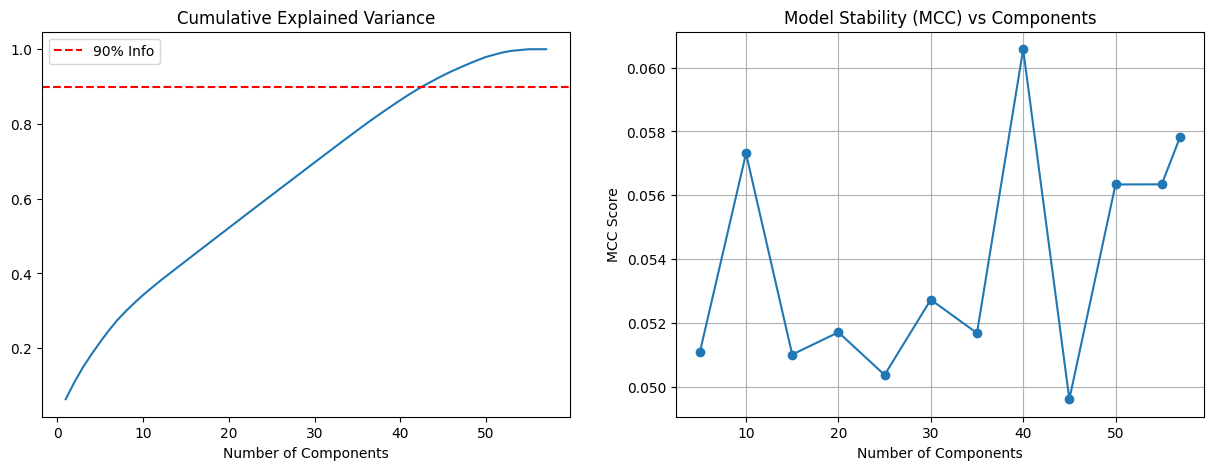

Best MCC (0.0606) achieved with 40 components.


In [252]:
test_pca_influence(X_tr_sc, ytrain, X_val_sc, yval)

The Cumulative Explained Variance curve is remarkably gradual, not steep. To capture 90% of the dataset's information, we need approximately 43-45 components <br>
This confirms that the predictive signal in this dataset is diffuse, spread thinly across many features rather than concentrated in a few dominant ones

# 8 The best combination and results

Defining modular preprocessing blocks (via previous steps) to ensure fair comparisons

In [260]:
cat_cols = [c for c in Xtrain.columns if '_cat' in c]
eng_step = ColumnTransformer([
    ('target_enc', ce.LeaveOneOutEncoder(cols=cat_cols, sigma=0.05), cat_cols)
], remainder='passthrough')

cols_cont = [c for c in Xtrain.columns if len(Xtrain[c].unique()) > 100]
bin_step = ColumnTransformer([
    ('quant', KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile'), cols_cont)
], remainder='passthrough')

sel_step = SelectFromModel(RandomForestClassifier(n_estimators=20, max_depth=5, random_state=RS))

dt_weighted = DecisionTreeClassifier(max_depth=8, class_weight='balanced', random_state=RS)
dt_plain = DecisionTreeClassifier(max_depth=8, class_weight=None, random_state=RS)

Constucting 6 Candidate Pipelines to test: <br>
Models 1-3: Test if Feature Engineering and Selection improve upon the Raw Baseline <br>
Model 4 (The Binner): Tests if simply discretizing skewed continuous features is the key <br>
Model 5 (The Geometer): Tests if PCA compression helps or hurts <br>
Model 6 (The Aggressive): Tests if physically removing majority data (RUS) beats weighting it

In [261]:
configs = [
    {
        'name': '1. Baseline (Raw + Weights)',
        'pipe': ImbPipeline([
            ('clf', dt_weighted)
        ])
    },
    {
        'name': '2. The Purist (Eng + Weights)',
        'pipe': ImbPipeline([
            ('eng', eng_step),
            ('clf', dt_weighted)
        ])
    },
    {
        'name': '3. The Selector (Eng + Sel + Weights)',
        'pipe': ImbPipeline([
            ('eng', eng_step),
            ('sel', sel_step),
            ('clf', dt_weighted)
        ])
    },
    {
        'name': '4. The Binner (Bin + Weights)',
        'pipe': ImbPipeline([
            ('bin', bin_step),
            ('clf', dt_weighted)
        ])
    },
    {
        'name': '5. The Geometer (Bin + PCA40 + Weights)',
        'pipe': ImbPipeline([
            ('bin', bin_step),
            ('scale', StandardScaler()),
            ('pca', PCA(n_components=40)),
            ('clf', dt_weighted)
        ])
    },
    {
        'name': '6. The Aggressive (Eng + RUS)',
        'pipe': ImbPipeline([
            ('eng', eng_step),
            ('rus', RandomUnderSampler(random_state=RS)),
            ('clf', dt_plain)
        ])
    }
]

In [262]:
results = []

print(f"Starting Tournament")

for config in configs:
    print(f"Running: {config['name']}...")
    
    model = config['pipe']
    
    model.fit(Xtrain, ytrain)
    
    ypred = model.predict(Xval)
    
    mcc = matthews_corrcoef(yval, ypred)
    f1 = f1_score(yval, ypred, pos_label=1)
    rec = recall_score(yval, ypred, pos_label=1)
    
    results.append({
        'Model': config['name'],
        'MCC': mcc,
        'F1 Class 1': f1,
        'Recall': rec
    })

df_res = pd.DataFrame(results).sort_values(by='MCC', ascending=False)

Starting Tournament
Running: 1. Baseline (Raw + Weights)...
Running: 2. The Purist (Eng + Weights)...
Running: 3. The Selector (Eng + Sel + Weights)...
Running: 4. The Binner (Bin + Weights)...
Running: 5. The Geometer (Bin + PCA40 + Weights)...
Running: 6. The Aggressive (Eng + RUS)...


The result:
                                     Model       MCC  F1 Class 1    Recall
3            4. The Binner (Bin + Weights)  0.067735    0.098672  0.513923
2    3. The Selector (Eng + Sel + Weights)  0.061357    0.096294  0.480643
0              1. Baseline (Raw + Weights)  0.060207    0.095377  0.489020
1            2. The Purist (Eng + Weights)  0.060004    0.093975  0.529319
5            6. The Aggressive (Eng + RUS)  0.053999    0.090978  0.527734
4  5. The Geometer (Bin + PCA40 + Weights)  0.048772    0.090628  0.434005


/var/folders/ms/rh6hs5x12g1b3s1v7jswnrs40000gn/T/ipykernel_1817/822754477.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_res, y='Model', x='MCC', palette='magma')


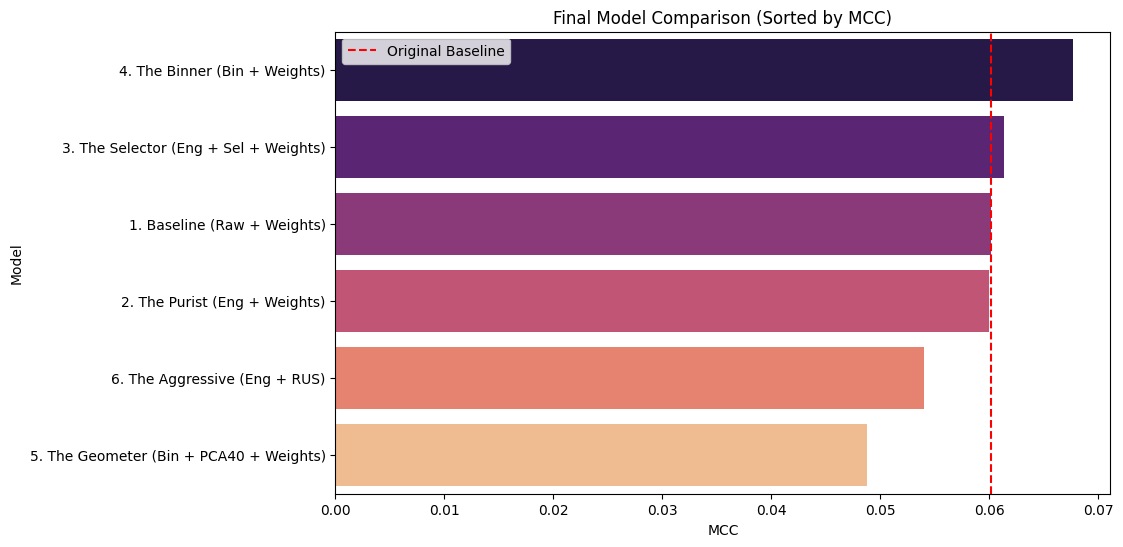

In [263]:
print("The result:")
print(df_res)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_res, y='Model', x='MCC', palette='magma')
plt.title('Final Model Comparison (Sorted by MCC)')
plt.axvline(x=0.0602, color='r', linestyle='--', label='Original Baseline')
plt.legend()
plt.show()

Model 4 ("The Binner") achieved the highest MCC (0.0677), a significant improvement over the Baseline (0.0602)
The single most effective strategy was Quantile Binning on continuous features. This confirms that the financial/numeric features contained the strongest signal, but their skewed distribution was hiding it from the model. Binning revealed this signal

In [285]:
print("1. Baseline Model (Raw Data)")
baseline_model = configs[0]['pipe'] 
baseline_model.fit(Xtrain, ytrain)
print("------------------------------------------------------")
eval(baseline_model, Xval, yval)
print("\n" + "="*60 + "\n")

print("2. The Champion: 'The Binner' (Quantile Binning)")
best_model = configs[3]['pipe']
best_model.fit(Xtrain, ytrain)
print("------------------------------------------------------")
eval(best_model, Xval, yval)

1. Baseline Model (Raw Data)
------------------------------------------------------
Overall Stability (MCC): 0.0602
Positive Class Performance (F1): 0.0954

Full Report:
              precision    recall  f1-score   support

           0       0.97      0.66      0.79    114625
           1       0.05      0.49      0.10      4417

    accuracy                           0.66    119042
   macro avg       0.51      0.58      0.44    119042
weighted avg       0.94      0.66      0.76    119042



2. The Champion: 'The Binner' (Quantile Binning)
------------------------------------------------------
Overall Stability (MCC): 0.0679
Positive Class Performance (F1): 0.1001

Full Report:
              precision    recall  f1-score   support

           0       0.97      0.69      0.81    114625
           1       0.06      0.48      0.10      4417

    accuracy                           0.68    119042
   macro avg       0.51      0.58      0.45    119042
weighted avg       0.94      0.68      

While Recall dropped slightly (-2%), Precision jumped by 20% (0.05 → 0.06). This means the Champion model reduced false positives significantly while maintaining a high detection rate